In [ ]:
import os
import sys
import time

from rose.metrics import GREATER_THAN_THRESHOLD
from rose.rl.reinforcement_learner import SequentialReinforcementLearner

from radical.asyncflow import WorkflowEngine, RadicalExecutionBackend

In [ ]:
execution_engine = await RadicalExecutionBackend({'resource': 'local.localhost'})
asyncflow = await WorkflowEngine.create(execution_engine, jupyter_async=True)
rl = SequentialReinforcementLearner(asyncflow)

code_path = f'{sys.executable} {os.getcwd()}'
data_path = os.path.join(os.getcwd(), 'data')

rl.work_dir=data_path
os.makedirs(data_path, exist_ok=True)

Resource Engine started successfully

Task 'environment' ready to submit; resolved dependencies: []
submitting ['environment'] for execution
task.000000 is DONE
Task 'update' ready to submit; resolved dependencies: ['environment']
submitting ['update'] for execution
task.000001 is DONE
Task 'check_reward' ready to submit; resolved dependencies: ['update']
submitting ['check_reward'] for execution
task.000002 is DONE
Task 'environment' ready to submit; resolved dependencies: []
submitting ['environment'] for execution
task.000003 is DONE
Task 'update' ready to submit; resolved dependencies: ['environment']
submitting ['update'] for execution
task.000004 is DONE
Task 'check_reward' ready to submit; resolved dependencies: ['update']
submitting ['check_reward'] for execution
task.000005 is DONE
Task 'environment' ready to submit; resolved dependencies: []
submitting ['environment'] for execution
task.000006 is DONE
Task 'update' ready to submit; resolved dependencies: ['environment']
submi

In [3]:
# Define and register the environment task
@rl.environment_task
async def environment(*args):
    return f'{code_path}/environment.py {data_path} 0.1 5 experience_bank.pkl'

# Define and register the policy update task
@rl.update_task
async def update(*args):
    return f'{code_path}/update.py {data_path}'

@rl.as_stop_criterion(metric_name='MODEL_REWARD', threshold=200, operator=GREATER_THAN_THRESHOLD)
async def check_reward(*args):
    return f'{code_path}/check_reward.py {data_path}'

In [4]:
env = await environment()
upd = await update()
stop_cond = await check_reward()

In [5]:
await rl.learn()

Starting Iteration-0
Registered task 'environment' and id of 000000 with dependencies: []
Registered task 'update' and id of 000001 with dependencies: ['environment']
Registered task 'check_reward' and id of 000002 with dependencies: ['update']
stop criterion metric: MODEL_REWARD is not met yet (9.17).
Starting Iteration-1
Registered task 'environment' and id of 000003 with dependencies: []
Registered task 'update' and id of 000004 with dependencies: ['environment']
Registered task 'check_reward' and id of 000005 with dependencies: ['update']
stop criterion metric: MODEL_REWARD is not met yet (9.29).
Starting Iteration-2
Registered task 'environment' and id of 000006 with dependencies: []
Registered task 'update' and id of 000007 with dependencies: ['environment']
Registered task 'check_reward' and id of 000008 with dependencies: ['update']
stop criterion metric: MODEL_REWARD is not met yet (9.36).
Starting Iteration-3
Registered task 'environment' and id of 000009 with dependencies: [

In [6]:
await rl.shutdown()

Shutdown is triggered, terminating the resources gracefully


Text(0.5, 1.0, 'Reward Values for Cart Pole')

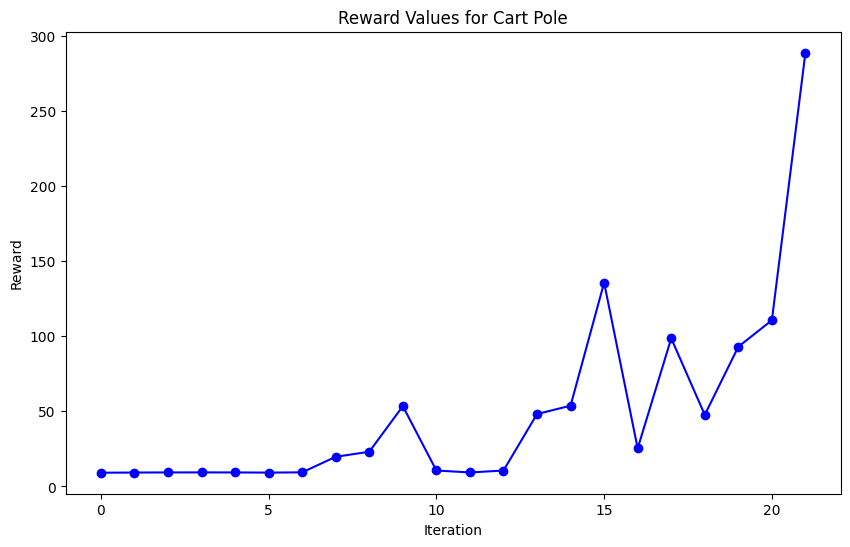

In [ ]:
import matplotlib.pyplot as plt
rewards = rl.get_metric_results()

plt.figure(figsize=(10, 6))
plt.plot(rewards.values(), marker='o', color='b', linestyle='-', markersize=6)

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.title('Reward Values for Cart Pole')